## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic=pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Determine if the survival rate is associated to the class of passenger**

In [3]:
class_survival_count = titanic.groupby(['Pclass', 'Survived']).size().unstack()
class_survival_count

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


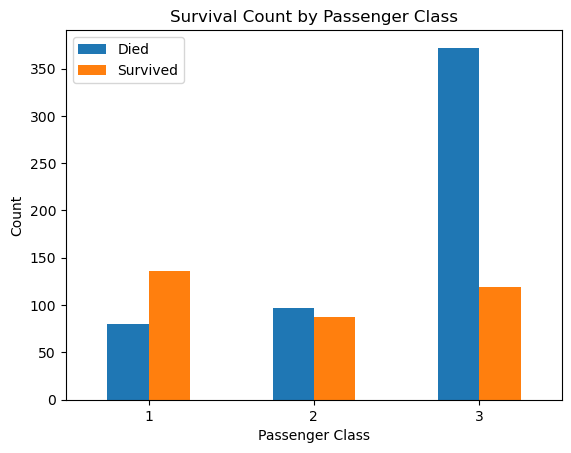

In [5]:
class_survival_count.plot(kind='bar', stacked=False)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])
plt.show()

**2) Determine if the survival rate is associated to the gender.**

In [7]:
gender_survival_count = titanic.groupby(['Sex', 'Survived']).size().unstack()
gender_survival_count

Survived,0,1
Sex,,
female,81,233
male,468,109


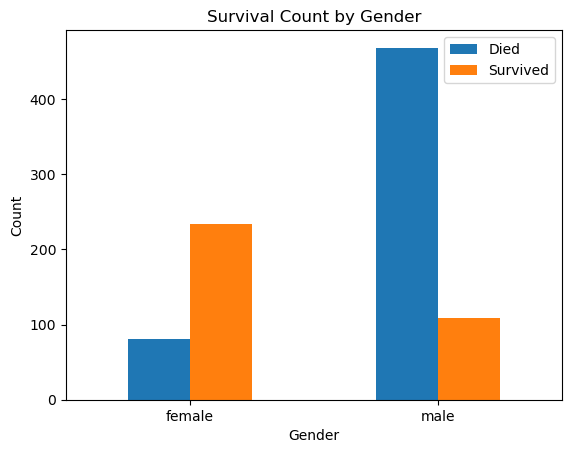

In [11]:
# Create a bar plot with the count of passengers who survived and died for each gender.
gender_survival_count.plot(kind='bar', stacked=False)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])
plt.show()

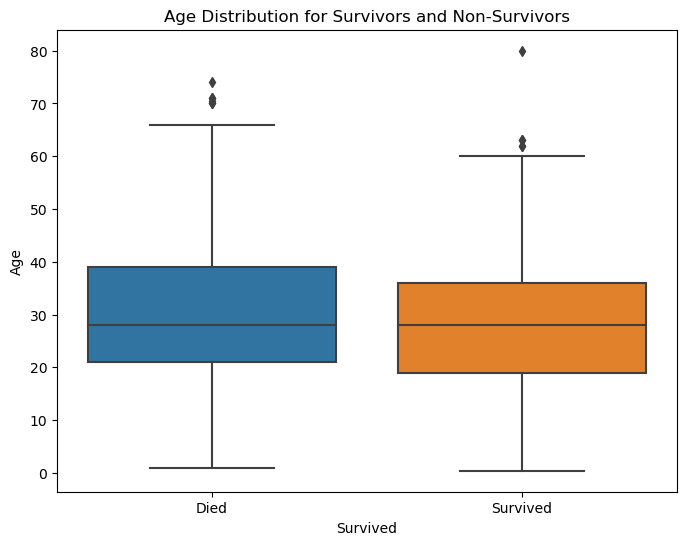

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age Distribution for Survivors and Non-Survivors')
plt.xlabel('Survived')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.ylabel('Age')
plt.vert=False 
plt.show()

In [22]:
age_survived = titanic[titanic['Survived'] == 1]['Age'].dropna()
age_died = titanic[titanic['Survived'] == 0]['Age'].dropna()

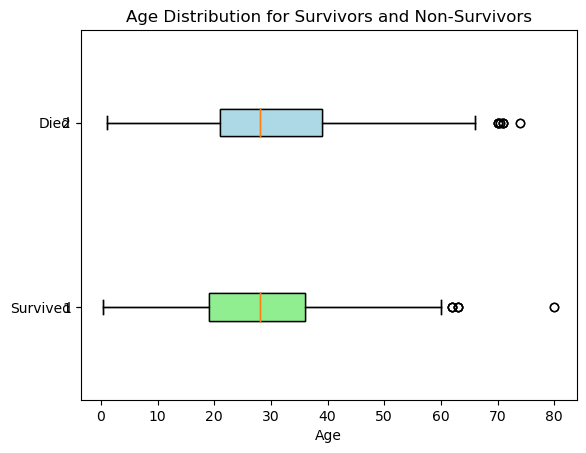

In [25]:
plt.boxplot([age_survived, age_died], labels=['Survived', 'Died'], vert=False, patch_artist=True)

box_colors = ['lightgreen', 'lightblue']
for patch, color in zip(plt.boxplot([age_survived, age_died], vert=False, patch_artist=True)['boxes'], box_colors):
    patch.set_facecolor(color)

plt.title('Age Distribution for Survivors and Non-Survivors')
plt.xlabel('Age')
plt.show()